In [2]:
from pandas import *
df=read_csv('weatherAUS.csv')

In [3]:
# 1) preprocessing - data filling or cleaning , encoding , scaling ( normalization )
# takes raw data and transforms it into a format that can be understood and analyzed by computers and machine learning. 
# it is imp. step in data mining and data analysis

df = df.fillna(df.median()) # replacing all the missing values in the data with median, and we can't use mean here because there are some -ve and 0 values here in the data

# now remove all string values data which can't be considered

df.drop(['WindGustDir','WindDir9am','WindDir3pm','Location','RainToday','Date'],axis=1,inplace=True)

# now normalize the given data i.e called data scaling
# Data Normalization could also be a typical practice in machine learning which consists of transforming numeric columns to a standard scale.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
model=scaler.fit(df.iloc[:,1:-1])
df.iloc[:,1:-1]=model.transform(df.iloc[:,1:-1])
df['RainTomorrow'].fillna('No',inplace=True) # replacing the missing data with the appropiate constant
df
df1=df.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [ ]:
# Now the data is preprocessed and ready to fit in the model

In [4]:
# so must be an numpy array , so encode it
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(df['RainTomorrow'])
nl=l.transform(df['RainTomorrow'])
df1['RainTomorrow']=nl
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,0.523629,0.001617,0.033103,0.57931,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.555556,0.508439,0.522073,0
1,7.4,0.565217,0.000000,0.033103,0.57931,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.555556,0.555556,0.514768,0.570058,0
2,12.9,0.576560,0.000000,0.033103,0.57931,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.555556,0.222222,0.594937,0.548944,0
3,9.2,0.620038,0.000000,0.033103,0.57931,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.555556,0.555556,0.533755,0.612284,0
4,17.5,0.701323,0.002695,0.033103,0.57931,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,0.533081,0.000000,0.033103,0.57931,0.193798,0.100000,0.126437,0.51,0.24,0.728926,0.6912,0.555556,0.555556,0.364979,0.533589,0
145456,3.6,0.568998,0.000000,0.033103,0.57931,0.124031,0.100000,0.103448,0.56,0.21,0.710744,0.6720,0.555556,0.555556,0.381857,0.573896,0
145457,5.4,0.599244,0.000000,0.033103,0.57931,0.240310,0.069231,0.103448,0.53,0.24,0.669421,0.6352,0.555556,0.555556,0.415612,0.604607,0
145458,7.8,0.601134,0.000000,0.033103,0.57931,0.170543,0.100000,0.080460,0.51,0.24,0.642975,0.6304,0.333333,0.222222,0.470464,0.602687,0


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


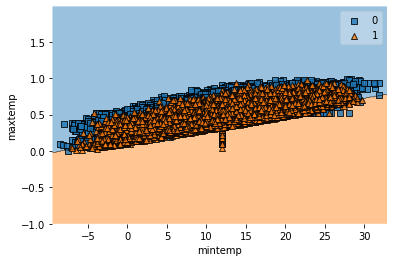

In [ ]:
# 1) logistic regression

# split the data into train and test
from sklearn.model_selection import train_test_split
x=df1.iloc[:,0:2].values
y=df1['RainTomorrow'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)  # splitting the data in two parts ( 70% and 30% )
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0).fit(x_train,y_train)
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(x_train,y_train,clf=clf)
plt.xlabel('mintemp')
plt.ylabel('maxtemp')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


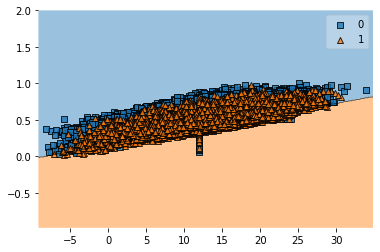

In [ ]:
clf=LogisticRegression(random_state=42)
clf.fit(x_test,y_test)
plot_decision_regions(x_test,y_test,clf=clf)
plt.show()

In [ ]:
# 2) KNN method

x1=df.iloc[:,0:-1].values
y1=df['RainTomorrow'].values
from sklearn.neighbors import KNeighborsClassifier
n=(round(len(df)**0.5))
niegh=KNeighborsClassifier(n_neighbors=n)
niegh.fit(x1,y1)

# now the model is created , and now we'll predict whether our model is accurate or not by testing the test data

KNeighborsClassifier(n_neighbors=381)

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.33,random_state=42)

In [ ]:
y_pred=niegh.predict(x1_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y1_test,y_pred)*100)

82.15699345860588


In [ ]:
# 3) Decision tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x2=df.iloc[:,0:-1].values
y2=df['RainTomorrow'].values
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.33,random_state=42) 
d=DecisionTreeClassifier(random_state=42)
d.fit(x2_train,y2_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y2_pred=d.predict(x2_test)
acc=accuracy_score(y2_test,y2_pred)
print(acc*100)

78.11341194116912


In [ ]:
# 4) Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
from sklearn.metrics import accuracy_score
x3=df.iloc[:,0:-1].values
y3=df['RainTomorrow'].values
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.33,random_state=42) 
rf.fit(x3_train,y3_train)


RandomForestClassifier(random_state=42)

In [ ]:
y3_pred=rf.predict(x3_test)
acc=accuracy_score(y3_test,y3_pred)
print(acc*100)

85.2339485854756


In [ ]:
# 5) SVM 
# applying svm model to the data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
x4=df.iloc[:,0:-1].values
y4=df['RainTomorrow'].values
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.33,random_state=42)
model=SVC(kernel='linear')
model.fit(x4_train,y4_train)
y4_pred=model.predict(x4_test)
print(accuracy_score(y4_test,y4_pred)*100)

In [ ]:
nw=df.to_csv('mycsv.csv',index=True)
dff=read_csv('/content/mycsv.csv') 

In [ ]:
# 6) Naive bayes
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
x5=df.iloc[:,1:-1].values 
y5=df.iloc[:,-1].values
x5_train,x5_test,y5_train,y5_test=train_test_split(x5,y5,test_size=0.33,random_state=42)
clf=CategoricalNB(alpha=42)
clf.fit(x5_train,y5_train) 
y5_test.reshape(-1,1)
y5_pred=clf.predict(x5_train).reshape(-1,1)
from sklearn.metrics import accuracy_score

a=df.iloc[178,1:-1].values.reshape(1,-1)     
print(a)
clf.predict(a)          

# accuracy_score(y5_test,y5_pred)    Found input variables with inconsistent numbers of samples: [48002, 97458]

[[0.387523629489603 0.0 0.03310344827586207 0.5793103448275863
  0.05426356589147287 0.0 0.022988505747126436 0.91 0.48
  0.7090909090909108 0.7120000000000015 0.5555555555555556
  0.5555555555555556 0.30168776371308015 0.39731285988483683]]


array(['No'], dtype='<U3')

In [ ]:
# so, as we observe all the models we get more accuracy for random forest 
# Therefor from my point of view random forest gives the best output result as compared to all other models
# And we can also try ' naive bayes ' to predict the rain tommorow in australia  

# I personally prefer this random forest and naive bayes to predict the rain tommorow in australia

In [27]:
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,0.523629,0.001617,0.033103,0.57931,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.555556,0.508439,0.522073,0
1,7.4,0.565217,0.000000,0.033103,0.57931,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.555556,0.555556,0.514768,0.570058,0
2,12.9,0.576560,0.000000,0.033103,0.57931,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.555556,0.222222,0.594937,0.548944,0
3,9.2,0.620038,0.000000,0.033103,0.57931,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.555556,0.555556,0.533755,0.612284,0
4,17.5,0.701323,0.002695,0.033103,0.57931,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,0.533081,0.000000,0.033103,0.57931,0.193798,0.100000,0.126437,0.51,0.24,0.728926,0.6912,0.555556,0.555556,0.364979,0.533589,0
145456,3.6,0.568998,0.000000,0.033103,0.57931,0.124031,0.100000,0.103448,0.56,0.21,0.710744,0.6720,0.555556,0.555556,0.381857,0.573896,0
145457,5.4,0.599244,0.000000,0.033103,0.57931,0.240310,0.069231,0.103448,0.53,0.24,0.669421,0.6352,0.555556,0.555556,0.415612,0.604607,0
145458,7.8,0.601134,0.000000,0.033103,0.57931,0.170543,0.100000,0.080460,0.51,0.24,0.642975,0.6304,0.333333,0.222222,0.470464,0.602687,0


In [28]:
# Target:
# applying multivariate linear regression for the given dataset and predict the output
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg=linear_model.LinearRegression()
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
dff=pd.DataFrame(x_train)
dff['RainTommorow']=y_train       

In [29]:
dff1=pd.DataFrame(x_test)
dff1['RainTommorow']=y_test

In [30]:
reg.fit(dff.iloc[:,:-1],dff['RainTommorow'])

LinearRegression()

In [31]:
dff1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTommorow
100721,15.0,0.448015,0.011321,0.045517,0.551724,0.372093,0.184615,0.356322,0.73,0.64,0.408264,0.4256,0.444444,0.555556,0.516878,0.441459,1
30234,13.1,0.597353,0.000000,0.031724,0.751724,0.255814,0.169231,0.172414,0.61,0.22,0.537190,0.5104,0.000000,0.111111,0.508439,0.600768,0
68427,19.0,0.638941,0.000000,0.075862,0.386207,0.410853,0.300000,0.252874,0.50,0.38,0.429752,0.4208,0.555556,0.555556,0.662447,0.625720,0
28624,18.1,0.699433,0.000000,0.014483,0.579310,0.186047,0.000000,0.195402,0.99,0.51,0.639669,0.6000,0.555556,0.555556,0.592827,0.710173,0
31173,13.9,0.461248,0.037736,0.008276,0.372414,0.341085,0.130769,0.252874,0.90,0.64,0.613223,0.6608,0.777778,0.666667,0.478903,0.470250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114283,5.5,0.359168,0.001078,0.033103,0.579310,0.170543,0.000000,0.172414,0.99,0.84,0.786777,0.7920,0.555556,0.555556,0.354430,0.328215,1
90240,17.0,0.665406,0.000000,0.033103,0.579310,0.193798,0.130769,0.252874,0.52,0.61,0.545455,0.5376,0.555556,0.555556,0.704641,0.650672,0
12446,21.8,0.712665,0.000000,0.068966,0.827586,0.356589,0.200000,0.103448,0.66,0.47,0.573554,0.5568,0.444444,0.555556,0.685654,0.700576,0
139660,25.3,0.706994,0.001078,0.031724,0.393103,0.224806,0.069231,0.229885,0.77,0.74,0.416529,0.4144,0.777778,0.888889,0.770042,0.683301,1


In [56]:
x_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTommorow
100721,15.0,0.448015,0.011321,0.045517,0.551724,0.372093,0.184615,0.356322,0.73,0.64,0.408264,0.4256,0.444444,0.555556,0.516878,0.441459,1
30234,13.1,0.597353,0.000000,0.031724,0.751724,0.255814,0.169231,0.172414,0.61,0.22,0.537190,0.5104,0.000000,0.111111,0.508439,0.600768,0
68427,19.0,0.638941,0.000000,0.075862,0.386207,0.410853,0.300000,0.252874,0.50,0.38,0.429752,0.4208,0.555556,0.555556,0.662447,0.625720,0
28624,18.1,0.699433,0.000000,0.014483,0.579310,0.186047,0.000000,0.195402,0.99,0.51,0.639669,0.6000,0.555556,0.555556,0.592827,0.710173,0
31173,13.9,0.461248,0.037736,0.008276,0.372414,0.341085,0.130769,0.252874,0.90,0.64,0.613223,0.6608,0.777778,0.666667,0.478903,0.470250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114283,5.5,0.359168,0.001078,0.033103,0.579310,0.170543,0.000000,0.172414,0.99,0.84,0.786777,0.7920,0.555556,0.555556,0.354430,0.328215,1
90240,17.0,0.665406,0.000000,0.033103,0.579310,0.193798,0.130769,0.252874,0.52,0.61,0.545455,0.5376,0.555556,0.555556,0.704641,0.650672,0
12446,21.8,0.712665,0.000000,0.068966,0.827586,0.356589,0.200000,0.103448,0.66,0.47,0.573554,0.5568,0.444444,0.555556,0.685654,0.700576,0
139660,25.3,0.706994,0.001078,0.031724,0.393103,0.224806,0.069231,0.229885,0.77,0.74,0.416529,0.4144,0.777778,0.888889,0.770042,0.683301,1


In [77]:
y_pred=reg.predict(x_test.iloc[:,:-1])
import numpy as np
from sklearn.metrics import accuracy_score
error=1/(x_test.shape[0])*np.sum(y_test-y_pred)
print(error*100)

# we observe the error is 0.41 %
# so, it is most effective method to predict the output

0.4162852435239569


In [ ]:
# so, finally multlinear regression and random forest are most effective ways for prediction